In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [3]:
gd = pd.read_csv('C:/Users/muruganusha/goldpricedata.csv')

In [4]:
gd

,Date,SPX,GLD,USO,SLV,EUR/USD
0,01-02-2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,01-03-2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,01-04-2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,01-07-2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,01-08-2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,05-08-2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,05-09-2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,05-10-2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


In [5]:
gd.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,01-02-2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,01-03-2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,01-04-2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,01-07-2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,01-08-2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [6]:
gd.shape

(2290, 6)

In [7]:
gd.info

<bound method DataFrame.info of             Date          SPX         GLD        USO      SLV   EUR/USD
0     01-02-2008  1447.160034   84.860001  78.470001  15.1800  1.471692
1     01-03-2008  1447.160034   85.570000  78.370003  15.2850  1.474491
2     01-04-2008  1411.630005   85.129997  77.309998  15.1670  1.475492
3     01-07-2008  1416.180054   84.769997  75.500000  15.0530  1.468299
4     01-08-2008  1390.189941   86.779999  76.059998  15.5900  1.557099
...          ...          ...         ...        ...      ...       ...
2285  05-08-2018  2671.919922  124.589996  14.060000  15.5100  1.186789
2286  05-09-2018  2697.790039  124.330002  14.370000  15.5300  1.184722
2287  05-10-2018  2723.070068  125.180000  14.410000  15.7400  1.191753
2288   5/14/2018  2730.129883  124.489998  14.380000  15.5600  1.193118
2289   5/16/2018  2725.780029  122.543800  14.405800  15.4542  1.182033

[2290 rows x 6 columns]>

In [8]:
gd.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [9]:
gd.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [10]:
corr = gd.corr()

<AxesSubplot:>

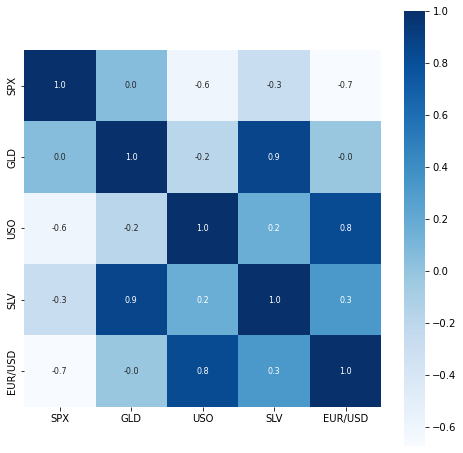

In [11]:
plt.figure(figsize=(8,8))
sns.heatmap(corr, cbar=True, square=True, fmt = '.1f', annot=True, annot_kws = {'size':8},cmap='Blues')

In [12]:
corr['GLD']

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64

<AxesSubplot:xlabel='GLD', ylabel='Count'>

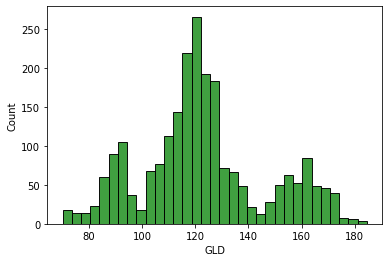

In [13]:
sns.histplot(gd['GLD'], color='green')

In [14]:
x=gd.drop(['Date','GLD'],axis = 1)
y=gd['GLD']
x

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.1800,1.471692
1,1447.160034,78.370003,15.2850,1.474491
2,1411.630005,77.309998,15.1670,1.475492
3,1416.180054,75.500000,15.0530,1.468299
4,1390.189941,76.059998,15.5900,1.557099
...,...,...,...,...
2285,2671.919922,14.060000,15.5100,1.186789
2286,2697.790039,14.370000,15.5300,1.184722
2287,2723.070068,14.410000,15.7400,1.191753
2288,2730.129883,14.380000,15.5600,1.193118


In [15]:
y

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64

In [26]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [27]:
regressor1=RandomForestRegressor(n_estimators = 100)

In [28]:
regressor1.fit(x_train,y_train)

RandomForestRegressor()

In [29]:
prediction1=reg.predict(x_test)

In [30]:
prediction1

array([168.58799914,  82.01179978, 115.9670003 , 127.51220036,
       120.69150138, 154.73889755, 149.88699906, 126.13110052,
       117.32169873, 126.16820062, 116.70650135, 170.84460113,
       141.17969779, 168.04699884, 115.12629999, 118.06140024,
       139.15480347, 170.28470097, 159.56000327, 159.8576998 ,
       155.2306997 , 125.47549981, 175.58379973, 157.63940326,
       125.20650051,  93.80939985,  77.26530007, 120.68830025,
       119.09329907, 167.44119981,  87.97850087, 125.3215997 ,
        91.03880042, 117.63210007, 121.06869927, 136.50830023,
       115.3704012 , 115.37840018, 148.00359969, 107.51390099,
       104.10090223,  87.24429788, 126.55840031, 118.10780014,
       153.27199909, 119.45950025, 108.4429998 , 107.9100983 ,
        93.15060068, 127.09709794,  75.30090032, 113.67369897,
       121.06630049, 111.30359925, 118.8511989 , 120.81029917,
       159.50770086, 170.66700061, 146.9089964 ,  85.92549858,
        94.28990016,  86.85439907,  90.47470032, 119.05

In [33]:
error_score = metrics.r2_score(y_test,prediction1)
print("R squared error : ", error_score)

R squared error :  0.9888956401799355
